## CNN Model on Cyber Bullying data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Waseem_clean_data.csv')

In [3]:
data.head()

,Unnamed: 0,content,lable
0,0,someone is going home <hashtag>mkr ..that obvi...,0.0
1,1,they didn't even wash the chicken emoticon_sad...,0.0
2,2,<hashtag>mkr is honestly so fucking staged. th...,0.0
3,3,can someone smash that bottle of rose &amp; li...,0.0
4,4,will someone pls assist colin in the washing o...,0.0


In [4]:
data.columns

Index(['Unnamed: 0', 'content', 'lable'], dtype='object')

In [5]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
data.isnull().any()

content    False
lable      False
dtype: bool

In [7]:
data.shape

(13763, 2)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['content'], data['lable'], test_size=0.10, random_state=30)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12386,), (1377,), (12386,), (1377,))

In [10]:
y_train.value_counts()

0.0    8589
1.0    3797
Name: lable, dtype: int64

In [11]:
type(X_train)

pandas.core.series.Series

In [12]:
X_train.head()

5570        user i don't know. but i feel like user would.
5633     until twitter provides us with a way to filter...
9315     “here’s the deal cooking is cooking!” ouch! yo...
5937     today i am happy to announce the online abuse ...
11633    rt user i'm not sexist..but man women's basket...
Name: content, dtype: object

* https://github.com/cbaziotis/ekphrasis

In [13]:
X_train.head()

5570        user i don't know. but i feel like user would.
5633     until twitter provides us with a way to filter...
9315     “here’s the deal cooking is cooking!” ouch! yo...
5937     today i am happy to announce the online abuse ...
11633    rt user i'm not sexist..but man women's basket...
Name: content, dtype: object

In [14]:
X_train = X_train.apply(lambda text: ''.join(list(' '.join(sent_lst for sent_lst in text))))

In [16]:
X_train.head(20)

5570     u s e r   i   d o n ' t   k n o w .   b u t   ...
5633     u n t i l   t w i t t e r   p r o v i d e s   ...
9315     “ h e r e ’ s   t h e   d e a l   c o o k i n ...
5937     t o d a y   i   a m   h a p p y   t o   a n n ...
11633    r t   u s e r   i ' m   n o t   s e x i s t . ...
9662     r t   u s e r   i t s   m e l t i n g   b e c ...
12192    r t   u s e r   c a l l   m e   s e x i s t   ...
10323    p i t y   t h e   t i d e   d i d n ' t   c o ...
8597     u s e r   t h a t ' s   f u c k i n g   r i c ...
12151    i   s e e   y o u r   m a t u r i t y   l e v ...
12076    h a s   t o   b e   a   p a r o d y   a c c o ...
10195    i   h a t e   k a t ' s   b i g   s m u g   f ...
3109     d i s n e y l a n d   o r   a   l i b r a r y ...
12363    r t   u s e r   i ' m   s o r r y   t o   a n ...
7047     u s e r   t h a t   i s   a n   a w e s o m e ...
10170    g o d   h e r   s m i l e   i s   b a d . .   ...
238      s e e   y o u   g f   w e e k   < h a s h t a .

In [17]:
type(X_train)

pandas.core.series.Series

In [18]:
import tensorflow as tf

In [19]:
tf.__version__

'2.0.0'

In [20]:
text_tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
text_tokenizer.fit_on_texts(X_train)

In [21]:
X_train_seq_data = text_tokenizer.texts_to_sequences(X_train)
X_train_seq_data = tf.keras.preprocessing.sequence.pad_sequences(X_train_seq_data, padding='post')

In [22]:
X_train_seq_data.shape

(12386, 1840)

In [23]:
X_train_seq_data[0]

array([11,  4,  1, ...,  0,  0,  0])

In [24]:
maxlen = X_train_seq_data.shape[1]

In [25]:
#X_train_seq_data[:1]

In [26]:
X_train_seq_to_text = text_tokenizer.sequences_to_texts(X_train_seq_data)

In [27]:
type(X_train_seq_to_text)

list

In [28]:
print(X_train_seq_to_text[:1])

["u s e r i d o n ' t k n o w . b u t i f e e l l i k e u s e r w o u l d ."]


In [29]:
text_tokenizer.word_index

{'e': 1,
 't': 2,
 'a': 3,
 's': 4,
 'i': 5,
 'o': 6,
 'r': 7,
 'n': 8,
 'h': 9,
 'l': 10,
 'u': 11,
 'm': 12,
 'd': 13,
 'g': 14,
 'c': 15,
 'y': 16,
 'k': 17,
 'w': 18,
 'p': 19,
 'f': 20,
 '.': 21,
 'b': 22,
 'v': 23,
 '<': 24,
 '>': 25,
 "'": 26,
 'x': 27,
 '!': 28,
 'j': 29,
 '?': 30,
 '"': 31,
 '0': 32,
 '1': 33,
 ':': 34,
 ';': 35,
 '2': 36,
 'q': 37,
 'z': 38,
 '&': 39,
 '-': 40,
 '5': 41,
 ')': 42,
 '/': 43,
 '3': 44,
 '4': 45,
 '_': 46,
 '*': 47,
 '(': 48,
 '7': 49,
 '8': 50,
 '%': 51,
 '9': 52,
 '6': 53,
 '’': 54,
 '”': 55,
 '“': 56,
 '^': 57,
 '️': 58,
 '=': 59,
 '+': 60,
 '\r': 61,
 '\n': 62,
 ']': 63,
 '[': 64,
 '|': 65,
 '$': 66,
 ',': 67,
 'é': 68,
 '~': 69,
 '‘': 70,
 '\\': 71,
 '\xa0': 72,
 '—': 73,
 '@': 74,
 'ê': 75,
 'ا': 76,
 'ي': 77,
 'ل': 78,
 'ı': 79,
 '–': 80,
 '`': 81,
 'ş': 82,
 '\u200b': 83,
 'î': 84,
 '\U000fe4e7': 85,
 'غ': 86,
 'ن': 87,
 'ى': 88,
 'ق': 89,
 'ب': 90,
 'à': 91,
 'ğ': 92,
 'ü': 93,
 'è': 94,
 'ā': 95,
 'ر': 96,
 'ص': 97,
 'ف': 98,
 'ة': 99,

In [30]:
#max_tuple = max(text_tokenizer.word_index.items(), key=lambda k: k[1])
#print(max_tuple[1])

In [31]:
X_train_seq_data = X_train_seq_data.reshape(X_train_seq_data.shape[0], maxlen, 1)

In [32]:
X_train_seq_data.shape

(12386, 1840, 1)

In [33]:
X_train_seq_data = X_train_seq_data.astype(np.float16)

In [34]:
X_train_seq_data[0]

array([[11.],
       [ 4.],
       [ 1.],
       ...,
       [ 0.],
       [ 0.],
       [ 0.]], dtype=float16)

* https://www.tensorflow.org/tutorials/text/word_embeddings
* https://www.tensorflow.org/tutorials/text/text_classification_rnn

In [35]:
X_test = X_test.apply(lambda text: ''.join(list(' '.join(sent_lst for sent_lst in text))))

In [36]:
X_test_seq_data = text_tokenizer.texts_to_sequences(X_test)
X_test_seq_data = tf.keras.preprocessing.sequence.pad_sequences(X_test_seq_data, padding='post', maxlen=maxlen)

In [37]:
X_test_seq_data.shape

(1377, 1840)

In [38]:
print('Test data max lengthed String: ', X_test_seq_data.shape[1])

Test data max lengthed String:  1840


In [39]:
X_test_seq_data = X_test_seq_data.reshape(X_test_seq_data.shape[0], maxlen, 1)

In [40]:
X_test_seq_data.shape

(1377, 1840, 1)

In [41]:
X_test_seq_data = X_test_seq_data.astype(np.float16)

In [42]:
X_test_seq_data[0]

array([[2.],
       [9.],
       [5.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float16)

In [43]:
#text_tokenizer.word_index

In [44]:
#embedding_dim = 150
vocab_size = len(text_tokenizer.word_index)+1  
print('vocab_size : ', vocab_size)
BATCH_SIZE = 16
BUFFER_SIZE = len(X_train)
print('BUFFER_SIZE : ', BUFFER_SIZE)

vocab_size :  101
BUFFER_SIZE :  12386


In [45]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_seq_data, y_train)).shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)
example_X, example_Y = next(iter(train_dataset))
print("example_X.shape : ", example_X.shape) 
print("example_Y.shape : ", example_Y.shape) 
print("dataset -  datatype : {}".format(type(train_dataset))) 
test_dataset = tf.data.Dataset.from_tensor_slices((X_test_seq_data, y_test)).shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

example_X.shape :  (16, 1840, 1)
example_Y.shape :  (16,)
dataset -  datatype : <class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>


In [46]:
y_train.value_counts()

0.0    8589
1.0    3797
Name: lable, dtype: int64

In [47]:
model = tf.keras.Sequential([
    
    tf.keras.layers.Conv1D(kernel_size=7, filters=16, padding='same', activation='relu', input_shape=(maxlen, 1)),
    tf.keras.layers.Conv1D(kernel_size=5, filters=8, padding='valid', activation='relu'),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.12)),
    #tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 1840, 16)          128       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1836, 8)           648       
_________________________________________________________________
flatten (Flatten)            (None, 14688)             0         
_________________________________________________________________
dense (Dense)                (None, 16)                235024    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 235,817
Trainable params: 235,817
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['accuracy'])

In [51]:
early_stopping_callback = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True, monitor='val_accuracy')
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint("5_3_waseem_deep_chat_tf_v8.h5", save_best_only=True)

history = model.fit(train_dataset, epochs=100,
                    validation_data=test_dataset, 
              callbacks=[checkpoint_callback, early_stopping_callback])

Epoch 1/100
774/774 [==============================] - 33s 43ms/step - loss: 0.5882 - accuracy: 0.7192 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
774/774 [==============================] - 50s 65ms/step - loss: 0.5861 - accuracy: 0.7165 - val_loss: 0.6166 - val_accuracy: 0.7071
Epoch 3/100
774/774 [==============================] - 49s 63ms/step - loss: 0.5840 - accuracy: 0.7203 - val_loss: 0.6207 - val_accuracy: 0.7166
Epoch 4/100
774/774 [==============================] - 49s 63ms/step - loss: 0.5814 - accuracy: 0.7230 - val_loss: 0.6206 - val_accuracy: 0.7078
Epoch 5/100
774/774 [==============================] - 50s 65ms/step - loss: 0.5802 - accuracy: 0.7244 - val_loss: 0.6139 - val_accuracy: 0.6962
Epoch 6/100
774/774 [==============================] - 45s 58ms/step - loss: 0.5777 - accuracy: 0.7259 - val_loss: 0.6120 - val_accuracy: 0.7100
Epoch 7/100
774/774 [==============================] - 53s 68ms/step - loss: 0.5768 - accuracy: 0.7271 - val_loss: 0.6058 

KeyboardInterrupt: 

In [49]:
model.predict(test_dataset)

array([[0.20731336],
       [0.23403594],
       [0.3281027 ],
       ...,
       [0.1554541 ],
       [0.19425964],
       [0.16646466]], dtype=float32)

In [50]:
sample_text_x, sample_test_y = next(iter(test_dataset))

In [51]:
print(model.predict_classes(sample_text_x))

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


In [52]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])
    plt.show()

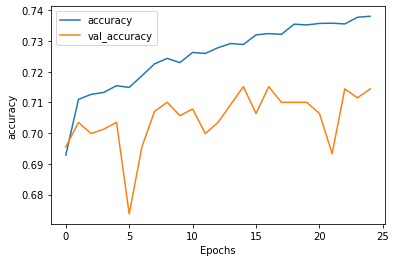

In [53]:
plot_graphs(history, 'accuracy')

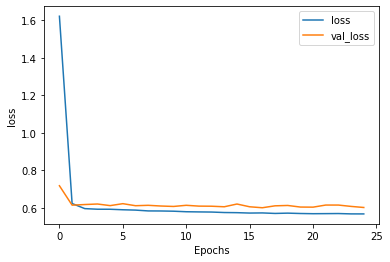

In [54]:
plot_graphs(history, 'loss')

In [55]:
#model.save("5.3_waseem_deep_chat_tf_v8.h5")

In [56]:
from sklean.metrics import f1_score

f1_score(model.predict_classes(test_dataset))

ModuleNotFoundError: No module named 'sklean'